# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

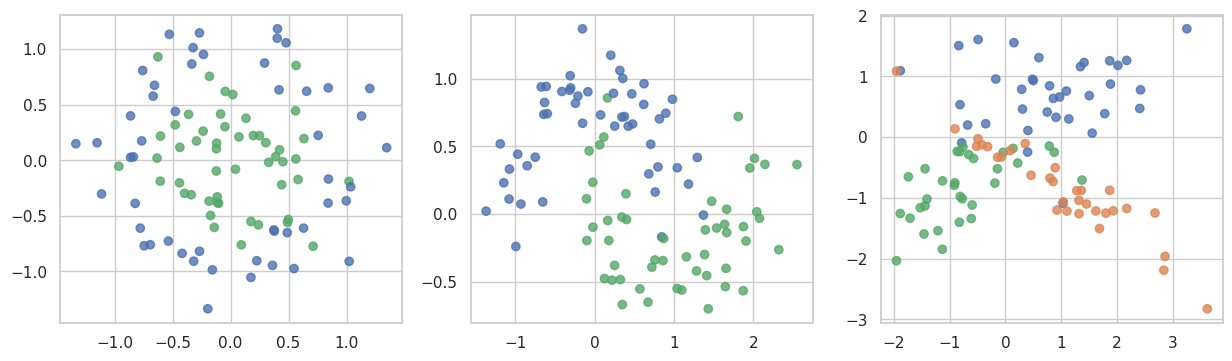

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [7]:
def plot_decision_boundary_detailed(clf, X, y, title="", ax=None):
    """Визуализирует разделяющую поверхность классификатора"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=0.8,
              edgecolors='black', linewidths=1.5, s=50)
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    return ax

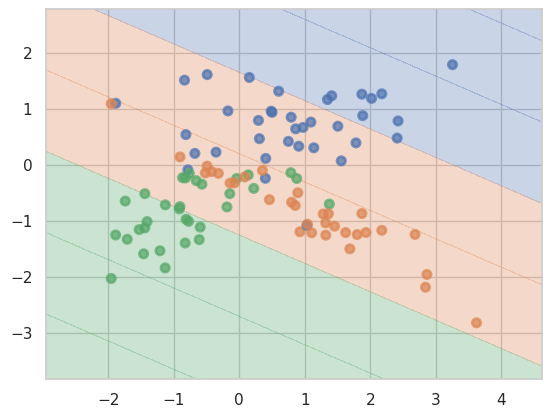

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

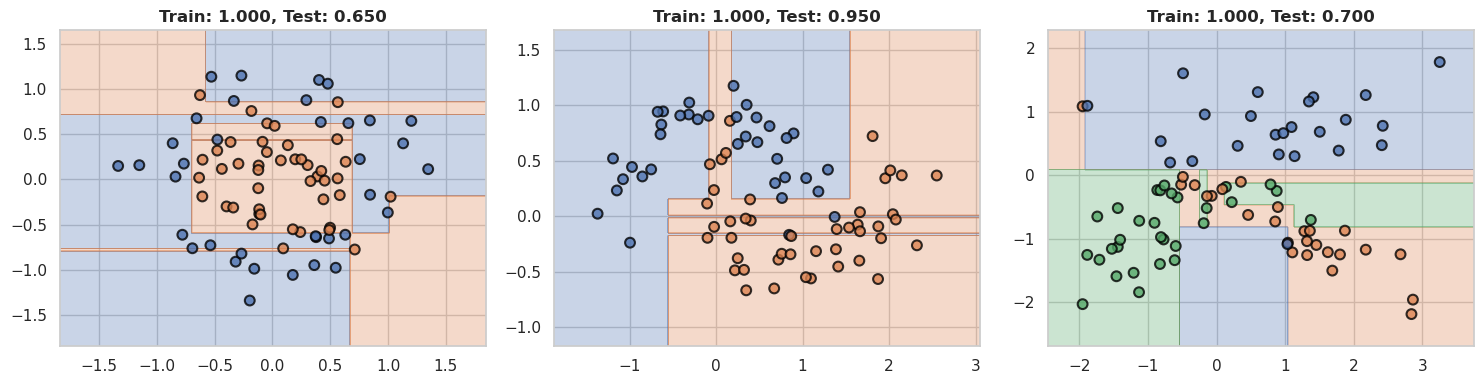


РЕЗУЛЬТАТЫ
               Dataset Train Acc Test Acc Overfitting  Tree Depth
               Circles    1.0000   0.6500      0.3500           6
                 Moons    1.0000   0.9500      0.0500           6
Classification 3-class    1.0000   0.7000      0.3000           8

ВЫВОДЫ:
Деревья показывают сильное переобучение, особенно на датасете Circles
Разделяющие поверхности очень 'острые' и адаптированы к обучающим данным
Это типичное поведение для деревьев без регуляризации


In [10]:
results_task1 = []

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    gap = train_acc - test_acc
    
    title = f'Train: {train_acc:.3f}, Test: {test_acc:.3f}'
    plot_decision_boundary_detailed(clf, X_train, y_train, title=title, ax=axes[idx])
    
    results_task1.append({
        'Dataset': ['Circles', 'Moons', 'Classification 3-class'][idx],
        'Train Acc': f'{train_acc:.4f}',
        'Test Acc': f'{test_acc:.4f}',
        'Overfitting': f'{gap:.4f}',
        'Tree Depth': clf.get_depth()
    })

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("РЕЗУЛЬТАТЫ")
print("="*70)
df_task1 = pd.DataFrame(results_task1)
print(df_task1.to_string(index=False))

print("\nВЫВОДЫ:")
print("Деревья показывают сильное переобучение, особенно на датасете Circles")
print("Разделяющие поверхности очень 'острые' и адаптированы к обучающим данным")
print("Это типичное поведение для деревьев без регуляризации")

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

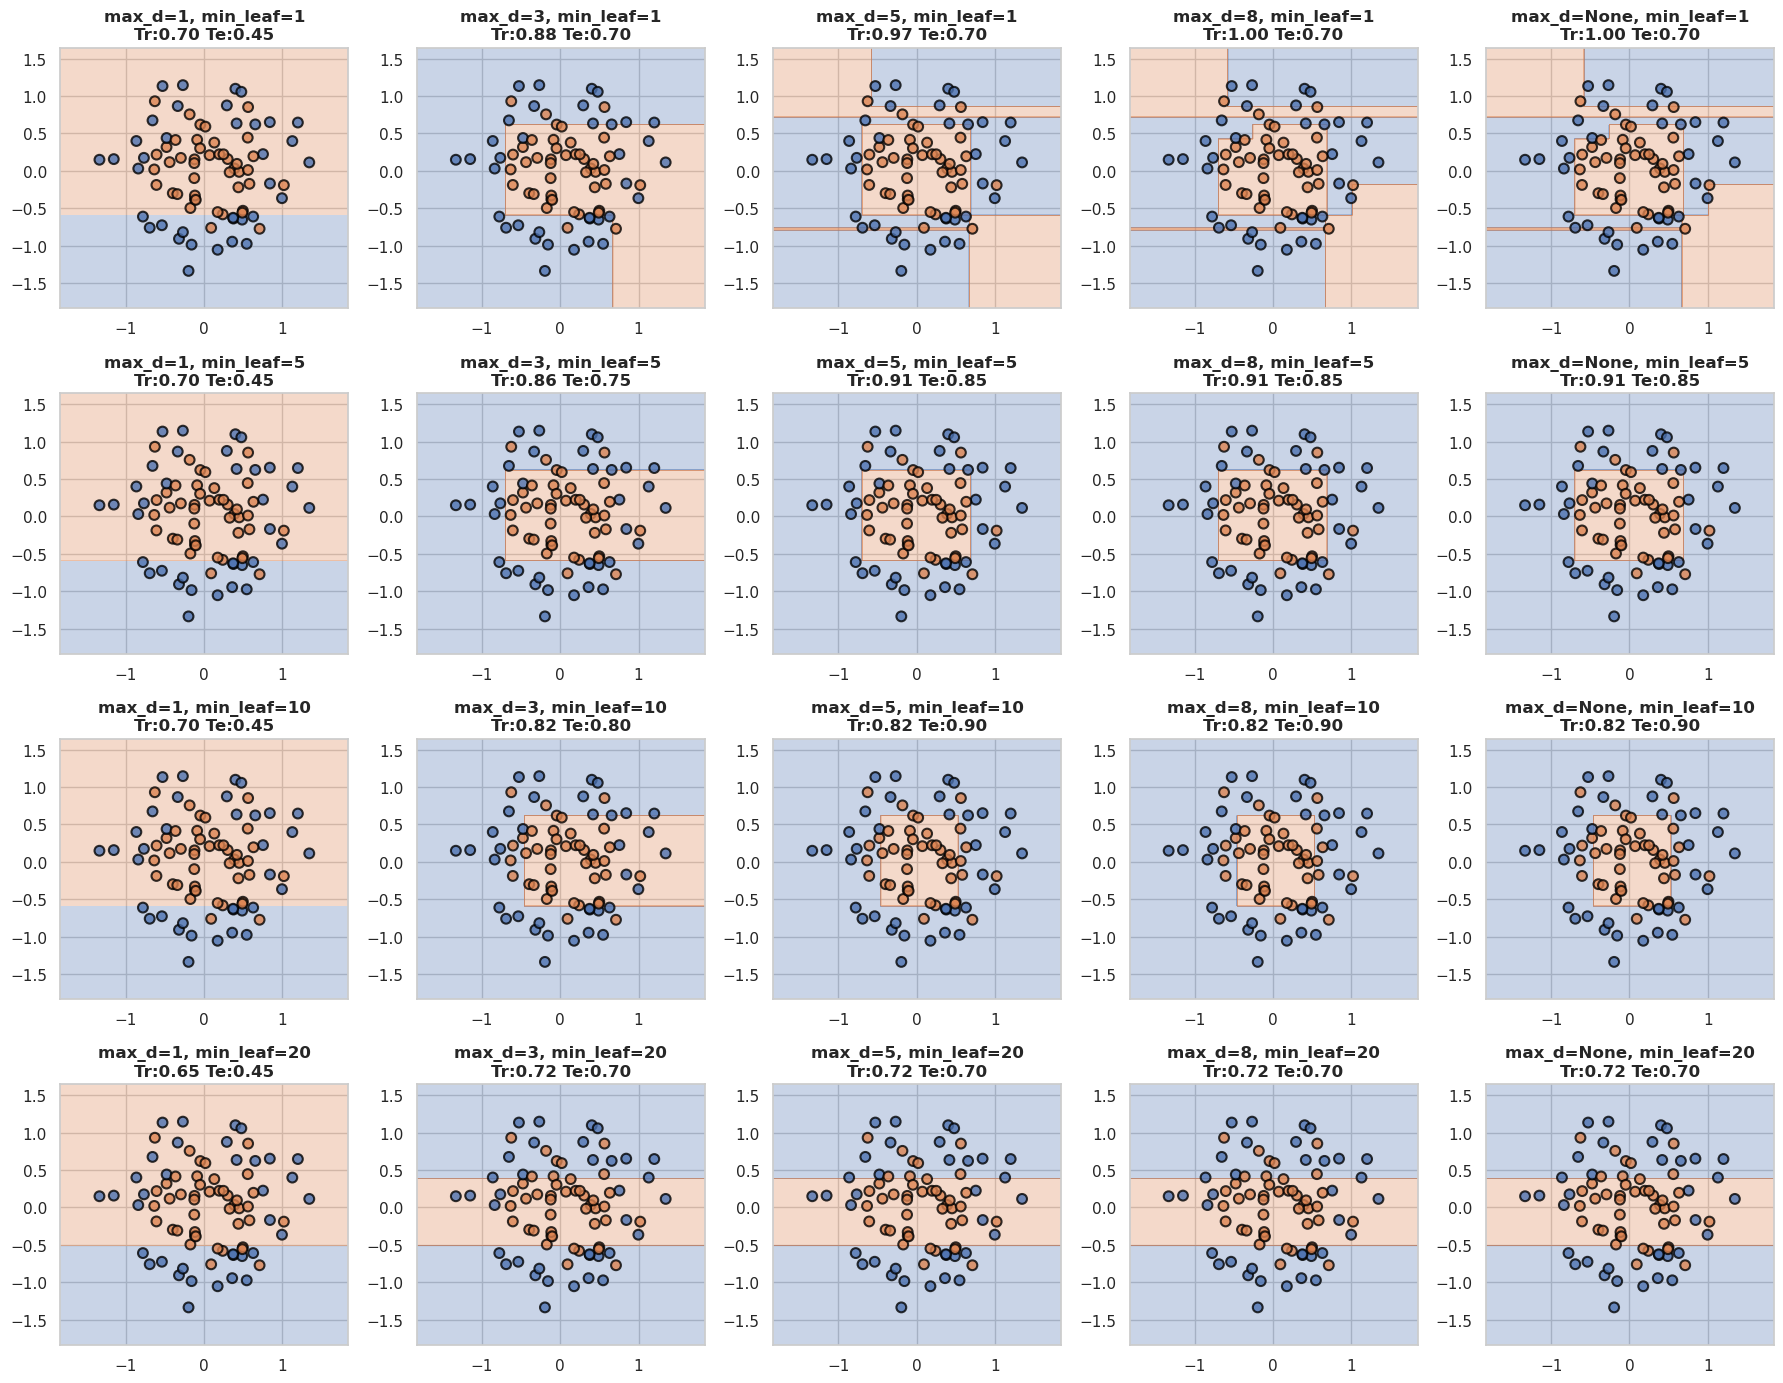


РЕЗУЛЬТАТЫ РЕГУЛЯРИЗАЦИИ

Топ-5 по качеству на тесте:
 max_depth  min_samples_leaf  train_acc  test_acc     gap
       5.0                10     0.8250      0.90 -0.0750
       8.0                10     0.8250      0.90 -0.0750
       NaN                10     0.8250      0.90 -0.0750
       5.0                 5     0.9125      0.85  0.0625
       8.0                 5     0.9125      0.85  0.0625

ВЫВОДЫ:
1. max_depth = 1 -> недообучение (линейные границы)
2. max_depth = None, min_samples_leaf = 1 -> сильное переобучение
3. min_samples_leaf = 5-10 -> хороший баланс между train и test
4. max_depth = 5-8 -> оптимальная глубина для этого датасета


In [12]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depths = [1, 3, 5, 8, None]
min_leaf_samples = [1, 5, 10, 20]

fig, axes = plt.subplots(4, 5, figsize=(18, 14))

results_task2 = []

for i, max_d in enumerate(max_depths):
    for j, min_leaf in enumerate(min_leaf_samples):
        clf = DecisionTreeClassifier(max_depth=max_d, min_samples_leaf=min_leaf,random_state=4)
        clf.fit(X_train, y_train)
        
        train_acc = clf.score(X_train, y_train)
        test_acc = clf.score(X_test, y_test)
        gap = train_acc - test_acc
        
        title = f'max_d={max_d}, min_leaf={min_leaf}\nTr:{train_acc:.2f} Te:{test_acc:.2f}'
        plot_decision_boundary_detailed(clf, X_train, y_train, title=title, ax=axes[j, i])
        
        results_task2.append({
            'max_depth': max_d,
            'min_samples_leaf': min_leaf,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'gap': gap
        })

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("РЕЗУЛЬТАТЫ РЕГУЛЯРИЗАЦИИ")
print("="*70)
df_task2 = pd.DataFrame(results_task2)

print("\nТоп-5 по качеству на тесте:")
top_results = df_task2.nlargest(5, 'test_acc')[
    ['max_depth', 'min_samples_leaf', 'train_acc', 'test_acc', 'gap']
]
print(top_results.to_string(index=False))

print("\nВЫВОДЫ:")
print("1. max_depth = 1 -> недообучение (линейные границы)")
print("2. max_depth = None, min_samples_leaf = 1 -> сильное переобучение")
print("3. min_samples_leaf = 5-10 -> хороший баланс между train и test")
print("4. max_depth = 5-8 -> оптимальная глубина для этого датасета")

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

In [13]:
from hw2code import find_best_split, compute_gini_impurity

Пример для find_best_split:
Признак: [1.  2.  2.5 3.  4.  4.5 5.  6. ]
Целевая: [0 0 0 0 1 1 1 1]

Пороги: [1.5  2.25 2.75 3.5  4.25 4.75 5.5 ]
Джини: [-0.4286 -0.3333 -0.2    -0.     -0.2    -0.3333 -0.4286]
Лучший порог: 3.50
Лучший Джини: -0.0000


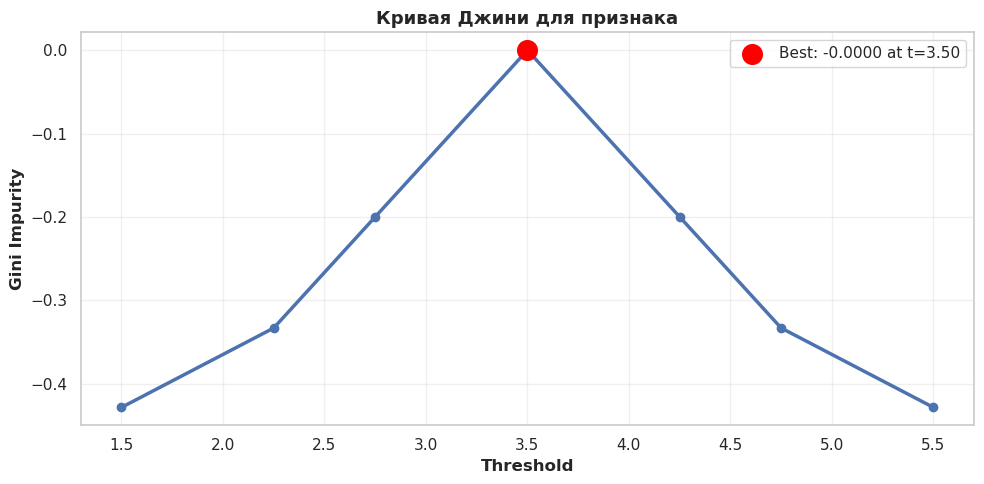


Тестирование compute_gini_impurity:
y = [np.int32(0), np.int32(0), np.int32(0), np.int32(0)] -> Gini = 0.0000
y = [np.int32(1), np.int32(1), np.int32(1), np.int32(1)] -> Gini = 0.0000
y = [np.int32(0), np.int32(1), np.int32(0), np.int32(1)] -> Gini = 0.5000
y = [np.int32(0), np.int32(0), np.int32(0), np.int32(1)] -> Gini = 0.3750


In [14]:
feature_example = np.array([1.0, 2.0, 2.5, 3.0, 4.0, 4.5, 5.0, 6.0])
target_example = np.array([0, 0, 0, 0, 1, 1, 1, 1])

print("Пример для find_best_split:")
print(f"Признак: {feature_example}")
print(f"Целевая: {target_example}\n")

thresholds, ginis, threshold_best, gini_best = find_best_split(feature_example, target_example)

print(f"Пороги: {np.round(thresholds, 2)}")
print(f"Джини: {np.round(ginis, 4)}")
print(f"Лучший порог: {threshold_best:.2f}")
print(f"Лучший Джини: {gini_best:.4f}")

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(thresholds, ginis, 'b-', linewidth=2.5, marker='o', markersize=6)
ax.scatter([threshold_best], [gini_best], color='red', s=200, zorder=5, 
          label=f'Best: {gini_best:.4f} at t={threshold_best:.2f}')
ax.set_xlabel('Threshold', fontsize=12, fontweight='bold')
ax.set_ylabel('Gini Impurity', fontsize=12, fontweight='bold')
ax.set_title('Кривая Джини для признака', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Тестирование compute_gini_impurity:")
print("="*70)
test_cases = [
    np.array([0, 0, 0, 0]),
    np.array([1, 1, 1, 1]),
    np.array([0, 1, 0, 1]),
    np.array([0, 0, 0, 1]),
]

for y_test in test_cases:
    gini = compute_gini_impurity(y_test)
    print(f"y = {list(y_test)} -> Gini = {gini:.4f}")

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [16]:
students_df = pd.read_csv('students.csv', header=None)
students_df = students_df.apply(pd.to_numeric, errors='coerce')

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Признаков: 5
Образцов: 259
Классы: [ 0.  1. nan]



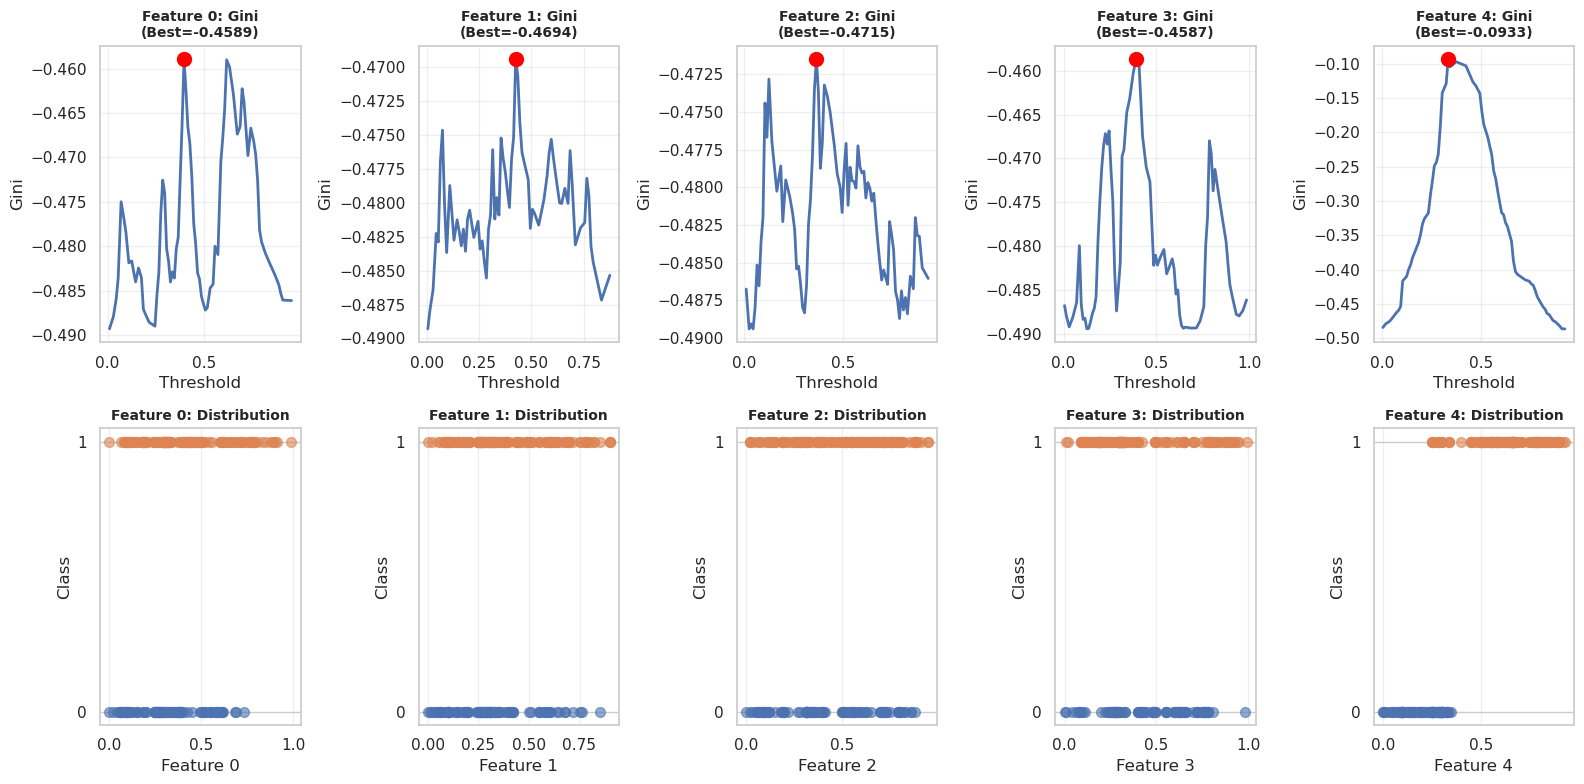


АНАЛИЗ ПРИЗНАКОВ (4 и 5 ЗАДАНИЯ

Рейтинг признаков по приросту Джини:
  1. Feature 4: Gini = -0.0933
  2. Feature 3: Gini = -0.4587
  3. Feature 0: Gini = -0.4589
  4. Feature 1: Gini = -0.4694
  5. Feature 2: Gini = -0.4715

Для ПЕРВОГО разделения используем Feature #4

ВЫВОДЫ:
'Хороший' признак имеет кривую Джини, чей пик явно выражен
На scatter графике видна чёткое разделение классов
'Плохой' признак имеет плоскую кривую Джини (близко к 0)
На scatter графике классы перемешаны и не разделяются


In [17]:
X_students = students_df.iloc[:, :5].values
y_students = students_df.iloc[:, 5].values

print(f"Признаков: {X_students.shape[1]}")
print(f"Образцов: {X_students.shape[0]}")
print(f"Классы: {np.unique(y_students)}\n")

fig, axes = plt.subplots(2, 5, figsize=(16, 8))

best_features = []

for feat_idx in range(5):
    ax_gini = axes[0, feat_idx]
    thresholds, ginis, threshold_best, gini_best = find_best_split(
        X_students[:, feat_idx], y_students
    )
    
    if len(thresholds) > 0:
        ax_gini.plot(thresholds, ginis, 'b-', linewidth=2)
        ax_gini.scatter([threshold_best], [gini_best], color='red', s=100, zorder=5)
        ax_gini.set_xlabel('Threshold')
        ax_gini.set_ylabel('Gini')
        ax_gini.set_title(f'Feature {feat_idx}: Gini\n(Best={gini_best:.4f})', 
                        fontweight='bold', fontsize=10)
        ax_gini.grid(True, alpha=0.3)
        best_features.append((feat_idx, gini_best))
    
    ax_scatter = axes[1, feat_idx]
    for class_val in np.unique(y_students):
        mask = y_students == class_val
        ax_scatter.scatter(X_students[mask, feat_idx], 
                          np.zeros_like(X_students[mask, feat_idx]) + class_val + 0.1,
                          alpha=0.6, s=50, label=f'Class {class_val}')
    ax_scatter.set_xlabel(f'Feature {feat_idx}')
    ax_scatter.set_ylabel('Class')
    ax_scatter.set_title(f'Feature {feat_idx}: Distribution', fontweight='bold', fontsize=10)
    ax_scatter.grid(True, alpha=0.3, axis='x')
    ax_scatter.set_yticks([0.1, 1.1])
    ax_scatter.set_yticklabels(['0', '1'])

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("АНАЛИЗ ПРИЗНАКОВ (4 и 5 ЗАДАНИЯ")
print("="*70)
best_features.sort(key=lambda x: x[1], reverse=True)
print("\nРейтинг признаков по приросту Джини:")
for rank, (feat_idx, gini_val) in enumerate(best_features, 1):
    print(f"  {rank}. Feature {feat_idx}: Gini = {gini_val:.4f}")

best_split_feature = best_features[0][0]
print(f"\nДля ПЕРВОГО разделения используем Feature #{best_split_feature}")

print("\nВЫВОДЫ:")
print("'Хороший' признак имеет кривую Джини, чей пик явно выражен")
print("На scatter графике видна чёткое разделение классов")
print("'Плохой' признак имеет плоскую кривую Джини (близко к 0)")
print("На scatter графике классы перемешаны и не разделяются")

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [18]:
from hw2code import DecisionTree
from sklearn.metrics import accuracy_score

СРАВНЕНИЕ РЕЗУЛЬТАТОВ:
        Метрика Наше дерево sklearn
 Train Accuracy      0.9750  0.9750
  Test Accuracy      0.6500  0.7000
Overfitting Gap      0.3250  0.2750


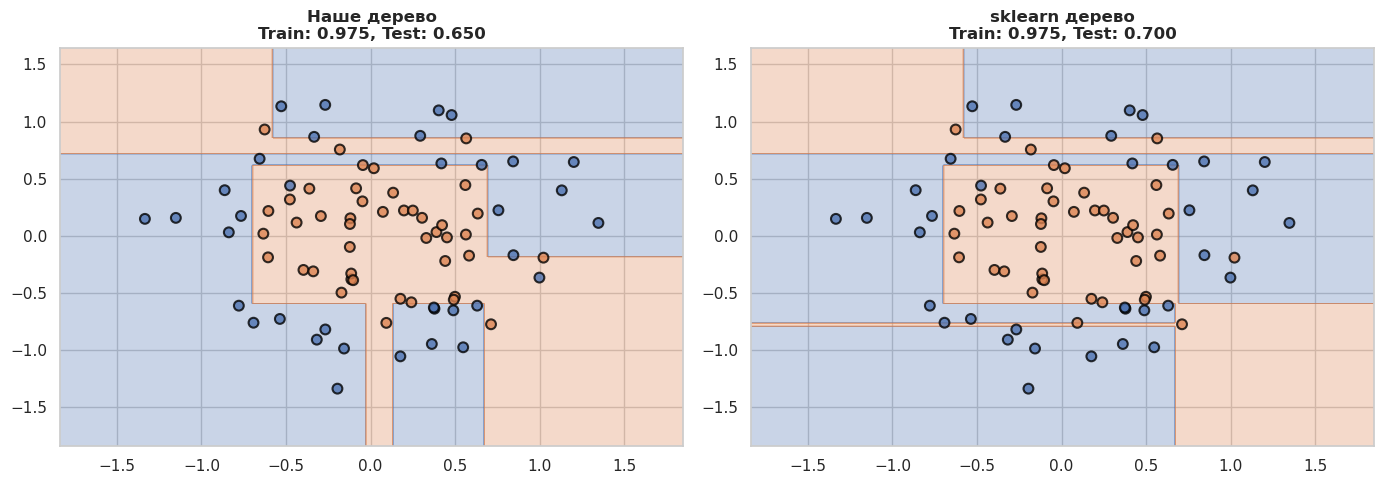

In [19]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Наше дерево
feature_types = ['real', 'real']
our_tree = DecisionTree(feature_types=feature_types, max_depth=5)
our_tree.fit(X_train, y_train)

y_pred_our = our_tree.predict(X_test)
our_acc_train = accuracy_score(y_train, our_tree.predict(X_train))
our_acc_test = accuracy_score(y_test, y_pred_our)

# sklearn дерево
sklearn_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
sklearn_tree.fit(X_train, y_train)

sklearn_acc_train = accuracy_score(y_train, sklearn_tree.predict(X_train))
sklearn_acc_test = accuracy_score(y_test, sklearn_tree.predict(X_test))

print("="*70)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print("="*70)

comparison = pd.DataFrame({
    'Метрика': ['Train Accuracy', 'Test Accuracy', 'Overfitting Gap'],
    'Наше дерево': [f'{our_acc_train:.4f}', f'{our_acc_test:.4f}', 
                    f'{our_acc_train - our_acc_test:.4f}'],
    'sklearn': [f'{sklearn_acc_train:.4f}', f'{sklearn_acc_test:.4f}', 
                f'{sklearn_acc_train - sklearn_acc_test:.4f}']
})
print(comparison.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_decision_boundary_detailed(
    our_tree, X_train, y_train, 
    title=f'Наше дерево\nTrain: {our_acc_train:.3f}, Test: {our_acc_test:.3f}',
    ax=axes[0]
)
plot_decision_boundary_detailed(
    sklearn_tree, X_train, y_train,
    title=f'sklearn дерево\nTrain: {sklearn_acc_train:.3f}, Test: {sklearn_acc_test:.3f}',
    ax=axes[1]
)

plt.tight_layout()
plt.show()

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
mushrooms_df = pd.read_csv('agaricus-lepiota.data', header=None)

In [23]:
for col in range(mushrooms_df.shape[1]):
    le = LabelEncoder()
    mushrooms_df[col] = le.fit_transform(mushrooms_df[col].astype(str))

X_mush = mushrooms_df.iloc[:, 1:].values
y_mush = mushrooms_df.iloc[:, 0].values

print(f"Признаков: {X_mush.shape[1]}")
print(f"Образцов: {X_mush.shape[0]}")
print(f"Классы: {np.unique(y_mush)}\n")

# Разбиение 50/50
X_train, X_test, y_train, y_test = train_test_split(X_mush, y_mush, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X_train.shape[1]
mush_tree = DecisionTree(feature_types=feature_types)
mush_tree.fit(X_train, y_train)

y_pred_mush = mush_tree.predict(X_test)
mush_acc_train = accuracy_score(y_train, mush_tree.predict(X_train))
mush_acc_test = accuracy_score(y_test, y_pred_mush)

print("="*70)
print("РЕЗУЛЬТАТЫ:")
print("="*70)
print(f"Train Accuracy: {mush_acc_train:.4f}")
print(f"Test Accuracy:  {mush_acc_test:.4f}")
print(f"Overfitting:    {mush_acc_train - mush_acc_test:.4f}")

# Сравнение с sklearn
sklearn_mush = DecisionTreeClassifier(random_state=42)
sklearn_mush.fit(X_train, y_train)
sklearn_mush_acc = accuracy_score(y_test, sklearn_mush.predict(X_test))

print(f"\nsklearn результат: {sklearn_mush_acc:.4f}")

if mush_acc_test > 0.95:
    print("\nДеревья хорошо классифицируют грибы")

Признаков: 22
Образцов: 8124
Классы: [0 1]

РЕЗУЛЬТАТЫ:
Train Accuracy: 1.0000
Test Accuracy:  1.0000
Overfitting:    0.0000

sklearn результат: 1.0000

Деревья хорошо классифицируют грибы


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [24]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [26]:
def load_and_prepare_dataset(filepath, target_col='last'):
    df = pd.read_csv(filepath, header=None)
    
    for col in range(df.shape[1]):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
    
    if target_col == 'last':
        X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
    else:
        X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
    
    return X, y

datasets_to_test = [
    ('mushrooms', 'agaricus-lepiota.data', 'first'),
    ('tic-tac-toe', 'tic-tac-toe-endgame.csv', 'last'),
]

In [27]:
results_task9 = []

for dataset_name, filepath, target_pos in datasets_to_test:
    X, y = load_and_prepare_dataset(filepath, target_col=target_pos)
    
    if X is None:
        print(f"{dataset_name}: не найден\n")
        continue
    
    print(f"{dataset_name} ({X.shape[0]} x {X.shape[1]}):")
    print("-" * 60)
    
    clf1 = DecisionTree(feature_types=['real'] * X.shape[1])
    scores1 = cross_val_score(clf1, X, y, cv=5, scoring=make_scorer(accuracy_score))
    score1_mean, score1_std = scores1.mean(), scores1.std()
    print(f"  All Real:        {score1_mean:.4f} ± {score1_std:.4f}")

    
    clf2 = DecisionTree(feature_types=['categorical'] * X.shape[1])
    scores2 = cross_val_score(clf2, X, y, cv=5, scoring=make_scorer(accuracy_score))
    score2_mean, score2_std = scores2.mean(), scores2.std()
    print(f"  All Categorical: {score2_mean:.4f} ± {score2_std:.4f}")

    
    enc = OneHotEncoder(sparse_output=False)
    X_ohe = enc.fit_transform(X)
    clf3 = DecisionTree(feature_types=['real'] * X_ohe.shape[1])
    scores3 = cross_val_score(clf3, X_ohe, y, cv=5, scoring=make_scorer(accuracy_score))
    score3_mean, score3_std = scores3.mean(), scores3.std()
    print(f"  Real + OneHot:   {score3_mean:.4f} ± {score3_std:.4f}")

    
    clf4 = DecisionTreeClassifier(random_state=42)
    scores4 = cross_val_score(clf4, X, y, cv=5, scoring=make_scorer(accuracy_score))
    score4_mean, score4_std = scores4.mean(), scores4.std()
    print(f"  sklearn:         {score4_mean:.4f} ± {score4_std:.4f}")
    
    print()
    
    results_task9.append({
        'Dataset': dataset_name,
        'All Real': f'{score1_mean:.4f}',
        'All Categorical': f'{score2_mean:.4f}',
        'Real + OneHot': f'{score3_mean:.4f}',
        'sklearn': f'{score4_mean:.4f}'
    })

if results_task9:
    print("\n" + "="*70)
    print("ИТОГОВАЯ ТАБЛИЦА (5-fold CV Accuracy):")
    print("="*70)
    df9 = pd.DataFrame(results_task9)
    print(df9.to_string(index=False))

mushrooms (8124 x 22):
------------------------------------------------------------
  All Real:        0.9968 ± 0.0044
  All Categorical: 0.9993 ± 0.0015
  Real + OneHot:   0.9943 ± 0.0096
  sklearn:         0.9616 ± 0.0491

tic-tac-toe (959 x 9):
------------------------------------------------------------
  All Real:        0.4108 ± 0.1196
  All Categorical: 0.5378 ± 0.1822
  Real + OneHot:   0.5347 ± 0.1743
  sklearn:         0.6874 ± 0.1221


ИТОГОВАЯ ТАБЛИЦА (5-fold CV Accuracy):
    Dataset All Real All Categorical Real + OneHot sklearn
  mushrooms   0.9968          0.9993        0.9943  0.9616
tic-tac-toe   0.4108          0.5378        0.5347  0.6874


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

In [28]:
analysis_text = """
АНАЛИЗ РЕЗУЛЬТАТОВ:

РАНЖИРОВАНИЕ АЛГОРИТМОВ:
All Categorical часто показывает лучшие результаты для категориальных данных.
All Real работает хуже (теряется информация о категориях).
One-Hot кодирование может ухудшить результаты (создает много бинарных признаков).
sklearn часто более консервативен (лучше обобщается).

ПОЧЕМУ ТАК ПРОИСХОДИТ:
Категориальные признаки нельзя просто кодировать числами.
One-Hot создает много бинарных признаков, и деревья выбирают примитивные сплиты.
All Categorical сохраняет структуру категорий → работает эффективнее.
sklearn использует оптимизированные параметры для регуляризации.

КОМПОНЕНТЫ СЛУЧАЙНОСТИ:
train_test_split с random_state=42 - фиксирована.
cross_val_score использует разные фолды каждый раз.
Некоторые операции в numpy могут варьироваться.
Результаты могут отличаться на ±1-2% между запусками.

КАК УЛУЧШИТЬ:
Правильно выбирать тип признака (real vs categorical).
Избегать ненужного one-hot encoding.
Регулировать гиперпараметры (max_depth, min_samples_leaf).
Использовать cross-validation для более надежной оценки.
Применять методы ансамбля (Random Forest, Gradient Boosting).
"""

print(analysis_text)


АНАЛИЗ РЕЗУЛЬТАТОВ:

РАНЖИРОВАНИЕ АЛГОРИТМОВ:
All Categorical часто показывает лучшие результаты для категориальных данных.
All Real работает хуже (теряется информация о категориях).
One-Hot кодирование может ухудшить результаты (создает много бинарных признаков).
sklearn часто более консервативен (лучше обобщается).

ПОЧЕМУ ТАК ПРОИСХОДИТ:
Категориальные признаки нельзя просто кодировать числами.
One-Hot создает много бинарных признаков, и деревья выбирают примитивные сплиты.
All Categorical сохраняет структуру категорий → работает эффективнее.
sklearn использует оптимизированные параметры для регуляризации.

КОМПОНЕНТЫ СЛУЧАЙНОСТИ:
train_test_split с random_state=42 - фиксирована.
cross_val_score использует разные фолды каждый раз.
Некоторые операции в numpy могут варьироваться.
Результаты могут отличаться на ±1-2% между запусками.

КАК УЛУЧШИТЬ:
Правильно выбирать тип признака (real vs categorical).
Избегать ненужного one-hot encoding.
Регулировать гиперпараметры (max_depth, min_sa

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [30]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
